In [ ]:
酶活性预测实战task：
1、基于T-R-train.csv数据，建立线性回归模型，计算其在T-R-test.csv数据上的r2分数，可视化模型预测结果 
2、加入多项式特征（2次、5次），建立回归模型
3、计算多项式回归模型对测试数据进行预测的r2分数，判断哪个模型预测更准确
4、可视化多项式回归模型数据预测结果，判断哪个模型预测更准确

In [2]:
import pandas as pd
import numpy as np

data_train = pd.read_csv("T-R-train.csv")
data_train.head()

,T,rate
0,46.53,2.49
1,48.14,2.56
2,50.15,2.63
3,51.36,2.69
4,52.57,2.74


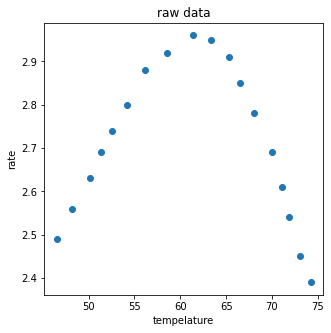

In [3]:
# define X y
X_train = data_train.loc[:,'T']
y_train = data_train.loc[:,'rate']
# 可视化数据
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5, 5))
plt.scatter(X_train, y_train)
plt.title('raw data')
plt.xlabel('tempelature')
plt.ylabel('rate')
plt.show()

In [4]:
# 使用线性模型
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
X_train = np.array(X_train).reshape(-1, 1)
lr1.fit(X_train, y_train)

LinearRegression()

In [7]:
#load test data
data_test = pd.read_csv("T-R-test.csv")
data_test.head()

,T,rate
0,45.376344,2.334559
1,52.186380,2.775735
2,61.863799,2.930147
3,73.154122,2.488971
4,78.888889,1.981618


In [9]:
# define X y
X_test = data_test.loc[:,'T']
y_test = data_test.loc[:,'rate']
X_test = np.array(X_test).reshape(-1, 1)
y_train_predict = lr1.predict(X_train)
y_test_predict = lr1.predict(X_test)

In [10]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test,y_test_predict)
print(f't2_train: {r2_train}')
print(f't2_test: {r2_test}')

t2_train: 0.016665703886981964
t2_test: -0.7583363437351314


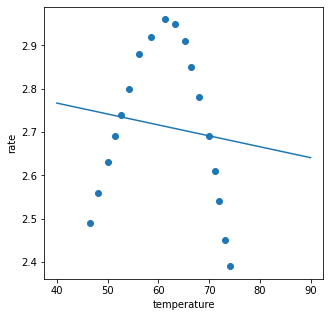

In [13]:
# 可视化模型结果
X_range = np.linspace(40, 90, 300).reshape(-1, 1)
y_range_predict = lr1.predict(X_range)
fig = plt.figure(figsize=(5,5))
plt.plot(X_range, y_range_predict)
# 加载原数据
plt.scatter(X_train, y_train)
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [16]:
# 多项式
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
# 二阶转化
X_2_train = poly2.fit_transform(X_train)
X_2_test = poly2.fit_transform(X_test)

print(X_2_test)

[[1.00000000e+00 4.53763441e+01 2.05901260e+03]
 [1.00000000e+00 5.21863799e+01 2.72341825e+03]
 [1.00000000e+00 6.18637993e+01 3.82712966e+03]
 [1.00000000e+00 7.31541219e+01 5.35152555e+03]
 [1.00000000e+00 7.88888889e+01 6.22345679e+03]
 [1.00000000e+00 8.24731183e+01 6.80181524e+03]
 [1.00000000e+00 4.30465950e+01 1.85300934e+03]]


In [23]:
# 使用线性回归，使用二阶数据
lr2 = LinearRegression()
lr2.fit(X_2_train, y_train)
y_2_train_predict = lr2.predict(X_2_train)
y_2_test_predict = lr2.predict(X_2_test)
r2_2_train = r2_score(y_train, y_2_train_predict)
r2_2_test = r2_score(y_test, y_2_test_predict)
print(f'r2_2_train: {r2_2_train}')
print(f'r2_2_test: {r2_2_test}')


r2_2_train: 0.970051540068943
r2_2_test: 0.996395455646867


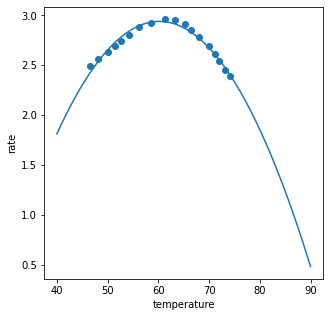

In [24]:
# 可视化
X_2_range = poly2.fit_transform(X_range)
y_2_range_predict = lr2.predict(X_2_range)
fig2 = plt.figure(figsize=(5,5))
plt.plot(X_range, y_2_range_predict)
# 加载原数据
plt.scatter(X_train, y_train)
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()